In [515]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


import os
from matplotlib import pyplot
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore


import warnings                                                                 
warnings.filterwarnings('ignore') 

# allow plots to appear directly in the notebook
%matplotlib inline

from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KernelDensity

In [516]:
# Get the CSV data here and print head
df= pd.read_csv('olx.csv')
df.head()

,Brand & Model,Varient,Fuel Type,Driven Kilometers,Transmission,Owner,Location,Date of Posting Ad,Price (in ₹)
0,Mahindra Xuv500 (2013),W8 Dual Tone,DIESEL,"58,000 KM",MANUAL,1st Owner,"Pitampura, Delhi",01/27/2022,435000
1,Hyundai Creta (2020),1.6 SX Option Executive Diesel,DIESEL,43861.0 KM,MANUAL,1st Owner,"Ahiritola, Kolkata",01/23/2022,1165101
2,Hyundai Verna (2019),VTVT 1.4 EX,PETROL,"17,000 KM",MANUAL,2nd Owner,"Chelavoor, Pantheeramkavu",01/25/2022,815000
3,Datsun Redigo (2020),D,PETROL,10000 KM,MANUAL,1st Owner,"Palam, Delhi",01/13/2022,270000
4,Hyundai I10 (2011),Sportz 1.1 iRDE2,PETROL,70000 KM,MANUAL,1st Owner,"Dwarka Sector 13, Delhi",01/13/2022,185000


In [517]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Brand & Model       5050 non-null   object
 1   Varient             5011 non-null   object
 2   Fuel Type           5050 non-null   object
 3   Driven Kilometers   5050 non-null   object
 4   Transmission        5050 non-null   object
 5   Owner               5050 non-null   object
 6   Location            5050 non-null   object
 7   Date of Posting Ad  5050 non-null   object
 8   Price (in ₹)        5050 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 355.2+ KB


In [518]:
df.shape

(5050, 9)

In [520]:
#finding unique values in object data types
def explore_object_type(df,feature_name):
    if df[feature_name].dtype == 'object':
        print(df[feature_name].value_counts())

In [521]:
for featureName in df:
    if df[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(df, str(featureName))


"Brand & Model's" Values with count are :
2013 Maruti Swift              173
2014 Maruti Swift              169
2015 Maruti Swift              142
2018 Maruti Alto 800            84
2017 Hyundai Grand i10          82
                              ... 
honda others (2017)              1
mahindra scorpio (2011)          1
maruti suzuki swift (2012)       1
maruti suzuki esteem (2005)      1
hyundai verna (2013)             1
Name: Brand & Model, Length: 382, dtype: int64

"Varient's" Values with count are :
['VDI']        364
['1.2']        357
['VXI']        212
['LXI']        140
['BS']         119
              ... 
['1.5']          1
['Turbo']        1
['GDI']          1
['1.2'           1
VTVT 1.6 EX      1
Name: Varient, Length: 345, dtype: int64

"Fuel Type's" Values with count are :
Petrol           2249
Diesel           1872
DIESEL            475
PETROL            366
Petrol + CNG       55
CNG                13
CNG & HYBRIDS      12
LPG                 7
CNG & Hybrids       1
N

In [333]:
#"Fuel Type's" Values with count are :
Diesel           1872
DIESEL            475
#Diesel and DIESEL are the same
#PETROL & petrol are the same

#"Transmission's" Values with count are :
Manual       3719
MANUAL        618
#Manual  & MANUAL is the same
#Automatic & AUTOMATIC are the same

#"Owner's" Values with count are :
1st Owner       3895
2nd Owner        935
3rd Owner         80
First Owner       39
Third Owner       24
Second Owner      21
4+ Owner          20
Fourth Owner      18
#NAME?            12
4th Owner          6

#1st Owner& First Owner are the same
#2nd Owner & Second Owner are the same
#3rd Owner & Third Owner are the same
#Fourth Owner & 4th Owner are the same

#NAME?            12
#this is an unknown column, which we will rename

SyntaxError: invalid syntax (3183883095.py, line 2)

In [393]:
# Replacing 'DIESEL' with 'Diesal'
#Replacing PETROL & petrol 

df["Fuel Type"] = df["Fuel Type"].replace("DIESEL", "Diesel")
df["Fuel Type"] = df["Fuel Type"].replace("PETROL", "Petrol")
df["Fuel Type"] = df["Fuel Type"].replace("CNG & HYBRIDS", "CNG & Hybrids")

In [439]:
#Manual  & MANUAL is the same
#Automatic & AUTOMATIC are the same

df["Transmission"] = df["Transmission"].replace("MANUAL", "Manual")
df["Transmission"] = df["Transmission"].replace("AUTOMATIC", "Automatic")

In [456]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5011 entries, 0 to 5049
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Brand & Model       5011 non-null   int32         
 1   Varient             5011 non-null   int32         
 2   Fuel Type           5011 non-null   int32         
 3   Driven Kilometers   5011 non-null   float64       
 4   Transmission        5011 non-null   int32         
 5   Owner               5011 non-null   int32         
 6   Location            5011 non-null   int32         
 7   Date of Posting Ad  5011 non-null   datetime64[ns]
 8   Price (in ₹)        5011 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int32(6), int64(1)
memory usage: 274.0 KB


In [444]:
df.Transmission.info

<bound method Series.info of 0       10
1       10
2       10
3       10
4       10
        ..
5045     5
5046    10
5047     5
5048    10
5049    10
Name: Transmission, Length: 5011, dtype: int32>

In [445]:
#replace 1st Owner with First Owner 
#replace 2nd Owner with Second Owner 
#replace 3rd Owner with Third Owner 
#replace Fourth Owner with 4th Owner 
#replace #NAME?  with unknown
df["Owner"] = df["Owner"].replace("1st Owner", "First Owner")
df["Owner"] = df["Owner"].replace("2nd Owner", "Second Owner")
df["Owner"] = df["Owner"].replace("3rd Owner", "Third Owner")
df["Owner"] = df["Owner"].replace("4th Owner", "Fourth Owner")
df["Owner"] = df["Owner"].replace("#NAME?", "unknown")

1    3898
3     953
4     104
2      24
0      20
5      12
Name: Owner, dtype: int64


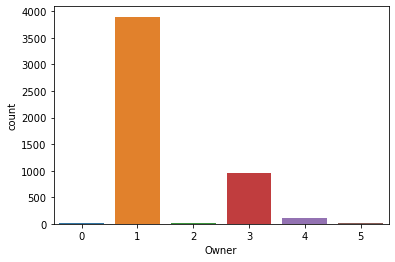

In [446]:
#checking f0r newly named values
import seaborn as sns  
location=sns.countplot(x="Owner", data=df)
print(df["Owner"].value_counts())
#as we can see the maximum owners own 1st hand cars

4    2611
2    2315
5      55
0      13
1      10
3       7
Name: Fuel Type, dtype: int64


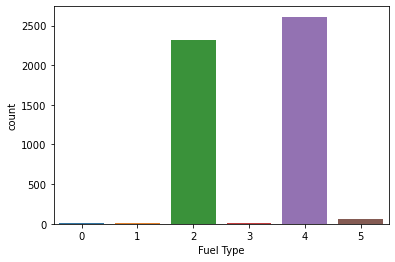

In [447]:
#checking f0r newly named values
import seaborn as sns  
location=sns.countplot(x="Fuel Type", data=df)
print(df["Fuel Type"].value_counts())
#as we can see the maximum car owners use petrol

10    4299
5      600
6       31
3       23
7       12
11       9
12       6
4        6
8        6
2        6
0        6
9        5
1        2
Name: Transmission, dtype: int64


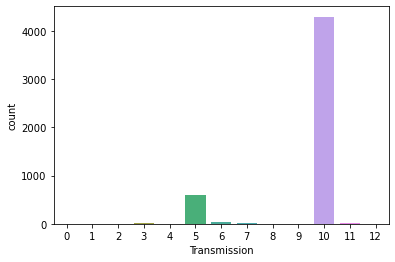

In [448]:
#checking f0r newly named values
import seaborn as sns  
location=sns.countplot(x="Transmission", data=df)
print(df["Transmission"].value_counts())
#as we can see the maximum car owners prefer manual transmissions

17000.0     40
90000.0     32
438610.0    29
145000.0    27
120000.0    24
            ..
50.0         1
55520.0      1
8748.0       1
78000.0      1
612310.0     1
Name: Driven Kilometers, Length: 755, dtype: int64


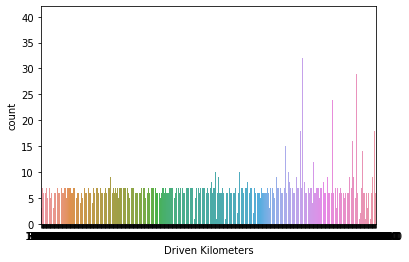

In [449]:
import seaborn as sns  
location=sns.countplot(x="Driven Kilometers", data=df)
print(df["Driven Kilometers"].value_counts())
#as we can see the maximum car owners drove 50000 km

In [450]:
#converting Driven Kilometers to numerical as it is listed in object type of data as listed above
try:
    df['Driven Kilometers'] = df['Driven Kilometers'].astype(float)
except ValueError as ve:
    print (ve)

17000.0     40
90000.0     32
438610.0    29
145000.0    27
120000.0    24
            ..
50.0         1
55520.0      1
8748.0       1
78000.0      1
612310.0     1
Name: Driven Kilometers, Length: 755, dtype: int64


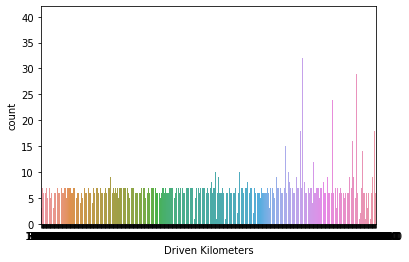

In [451]:
#checking the data for Driven Kilometers
import seaborn as sns  
location=sns.countplot(x="Driven Kilometers", data=df)
print(df["Driven Kilometers"].value_counts())

In [452]:
#removing unique features in Driven Kilometers- removing ','
df['Driven Kilometers'] = df['Driven Kilometers'].str.replace(',', '')

AttributeError: Can only use .str accessor with string values!

In [ ]:
#removing unique features in Driven Kilometers- removing 'KM'
df['Driven Kilometers'] = df['Driven Kilometers'].str.replace('KM', '')

In [ ]:
#removing unique features in Driven Kilometers- removing 'Km'
df['Driven Kilometers'] = df['Driven Kilometers'].str.replace('Km', '')

In [ ]:
#removing unique features in Driven Kilometers- removing '.'
df['Driven Kilometers'] = df['Driven Kilometers'].str.replace('.', '')

In [ ]:
#removing unique features in Driven Kilometers- removing 'km'
df['Driven Kilometers'] = df['Driven Kilometers'].str.replace('km', '')

In [ ]:
try:
    df['Driven Kilometers'] = df['Driven Kilometers'].astype(float)
except ValueError as ve:
    print (ve)

In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5011 entries, 0 to 5049
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Brand & Model       5011 non-null   int32         
 1   Varient             5011 non-null   int32         
 2   Fuel Type           5011 non-null   int32         
 3   Driven Kilometers   5011 non-null   float64       
 4   Transmission        5011 non-null   int32         
 5   Owner               5011 non-null   int32         
 6   Location            5011 non-null   int32         
 7   Date of Posting Ad  5011 non-null   datetime64[ns]
 8   Price (in ₹)        5011 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int32(6), int64(1)
memory usage: 274.0 KB


In [410]:
#as we can see varient is not balanced
#as it is a small amount, we can substitute with mode or remove completely
drop_na = ["Varient"]

for i in drop_na:
    print (i, ":", round((df[i].isna().sum()/df.shape[0])*100, 2))

Varient : 0.77


In [411]:
df = df.dropna(subset=drop_na, axis=0)

In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5011 entries, 0 to 5049
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand & Model       5011 non-null   object 
 1   Varient             5011 non-null   object 
 2   Fuel Type           5011 non-null   object 
 3   Driven Kilometers   5011 non-null   float64
 4   Transmission        5011 non-null   object 
 5   Owner               5011 non-null   object 
 6   Location            5011 non-null   object 
 7   Date of Posting Ad  5011 non-null   object 
 8   Price (in ₹)        5011 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 391.5+ KB


01-27-2022    897
01/22/2022    607
01/15/2022    604
06-01-2022    529
05-01-2022    373
             ... 
01/27/2022      3
12/26/2021      1
12/20/2021      1
02/27/2021      1
12/25/2021      1
Name: Date of Posting Ad, Length: 62, dtype: int64


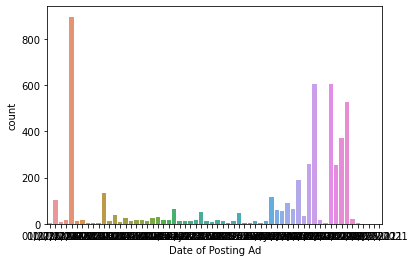

In [413]:
#checking f0r newly named values
import seaborn as sns  
location=sns.countplot(x="Date of Posting Ad", data=df)
print(df["Date of Posting Ad"].value_counts())

In [415]:
#coverting date into date time data type
df['Date of Posting Ad']=pd.to_datetime(df['Date of Posting Ad'])
df.head()

ParserError: Unknown string format: Maharashtra

In [417]:
#removing unique values in the Date of Posting Ad that are not dates
df['Date of Posting Ad'] = df['Date of Posting Ad'].str.replace('Maharashtra', '')
df['Date of Posting Ad'] = df['Date of Posting Ad'].str.replace('Delhi', '')
df['Date of Posting Ad'] = df['Date of Posting Ad'].str.replace('Rajasthan', '')
df['Date of Posting Ad'] = df['Date of Posting Ad'].str.replace('WB', '')
df['Date of Posting Ad'] = df['Date of Posting Ad'].str.replace('Other minor issues', '')
df['Date of Posting Ad'] = df['Date of Posting Ad'].str.replace('Haryana', '')
df['Date of Posting Ad'] = df['Date of Posting Ad'].str.replace('AP', '')

In [418]:
df['Date of Posting Ad']=pd.to_datetime(df['Date of Posting Ad'])
df.head()

,Brand & Model,Varient,Fuel Type,Driven Kilometers,Transmission,Owner,Location,Date of Posting Ad,Price (in ₹)
0,Mahindra Xuv500 (2013),W8 Dual Tone,Diesel,58000.0,Manual,First Owner,"Pitampura, Delhi",2022-01-27,435000
1,Hyundai Creta (2020),1.6 SX Option Executive Diesel,Diesel,438610.0,Manual,First Owner,"Ahiritola, Kolkata",2022-01-23,1165101
2,Hyundai Verna (2019),VTVT 1.4 EX,Petrol,17000.0,Manual,Second Owner,"Chelavoor, Pantheeramkavu",2022-01-25,815000
3,Datsun Redigo (2020),D,Petrol,10000.0,Manual,First Owner,"Palam, Delhi",2022-01-13,270000
4,Hyundai I10 (2011),Sportz 1.1 iRDE2,Petrol,70000.0,Manual,First Owner,"Dwarka Sector 13, Delhi",2022-01-13,185000


In [460]:
#using mode to replace null values
df['Date of Posting Ad'] = df['Date of Posting Ad'].fillna(df['Date of Posting Ad'].mode()[0])

In [461]:
#checking for balance in data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5011 entries, 0 to 5049
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Brand & Model       5011 non-null   int32         
 1   Varient             5011 non-null   int32         
 2   Fuel Type           5011 non-null   int32         
 3   Driven Kilometers   5011 non-null   float64       
 4   Transmission        5011 non-null   int32         
 5   Owner               5011 non-null   int32         
 6   Location            5011 non-null   int32         
 7   Date of Posting Ad  5011 non-null   datetime64[ns]
 8   Price (in ₹)        5011 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int32(6), int64(1)
memory usage: 274.0 KB


In [423]:
df.describe(include=['object','datetime']).transpose()

,count,unique,top,freq,first,last
Brand & Model,5011,374,2013 Maruti Swift,173,NaT,NaT
Varient,5011,345,['VDI'],364,NaT,NaT
Fuel Type,5011,6,Petrol,2611,NaT,NaT
Transmission,5011,13,Manual,4299,NaT,NaT
Owner,5011,6,First Owner,3898,NaT,NaT
Location,5011,185,"Chelavoor, Pantheeramkavu",210,NaT,NaT
Date of Posting Ad,5011,44,2022-01-27 00:00:00,996,2021-02-27,2022-12-01


In [362]:
#we can observe that 2013 Maruti Swift is the best brand and model 
#The most popular varient is ['VDI']
#The most popular location is Chelavoor, Pantheeramkavu to buy cars
#The most popular Date of Posting Ad is 2021-02-27(27th Feb 2021)

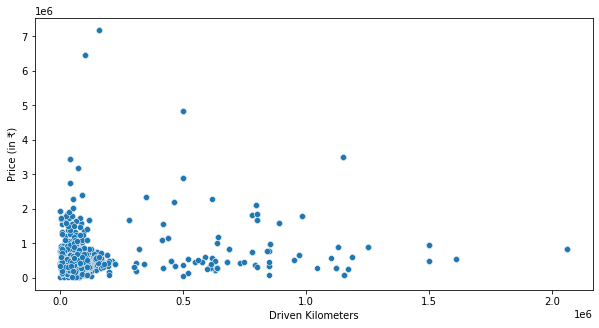

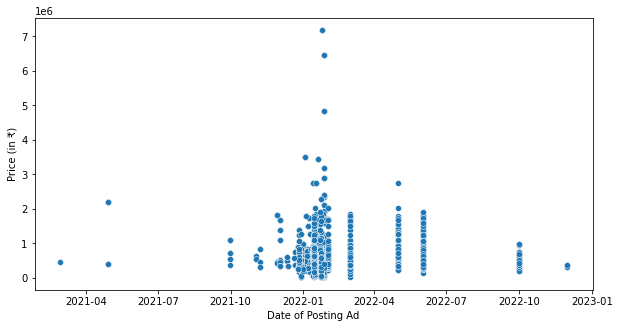

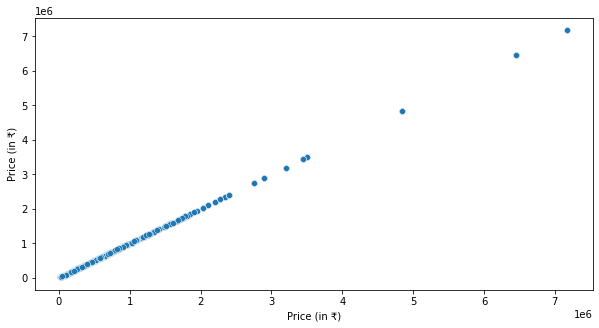

In [426]:
#measuring sales relation with all other columns:
for col in df.columns:
    if df[col].dtype != 'object':
        plt.figure(figsize=(10,5))
        sns.scatterplot(x=col,y='Price (in ₹)',data=df)

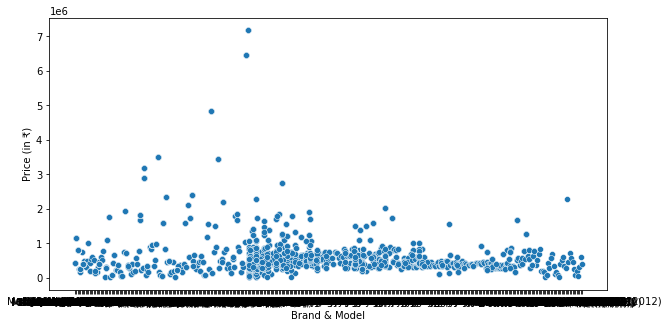

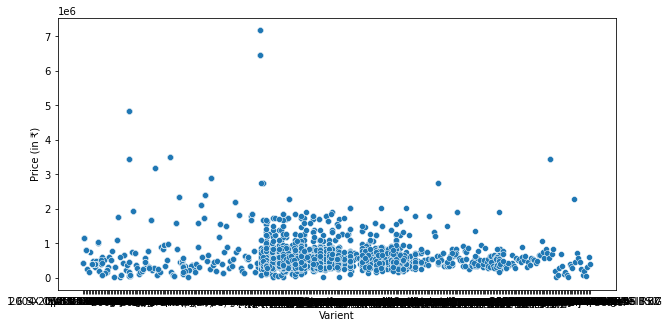

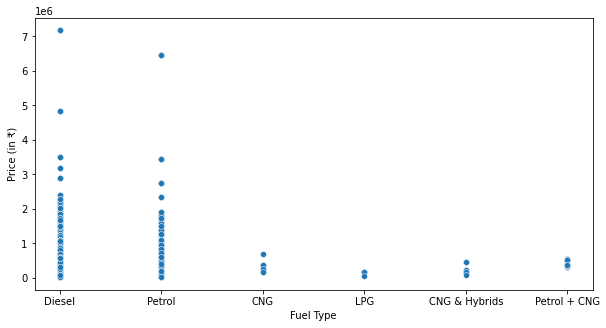

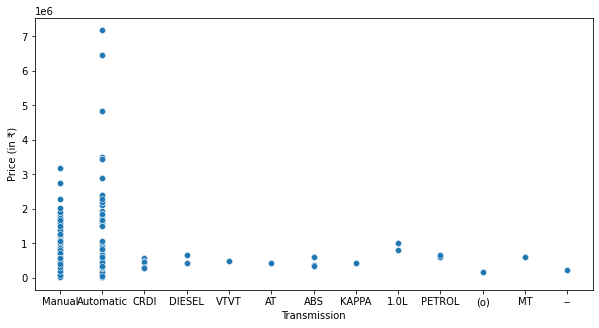

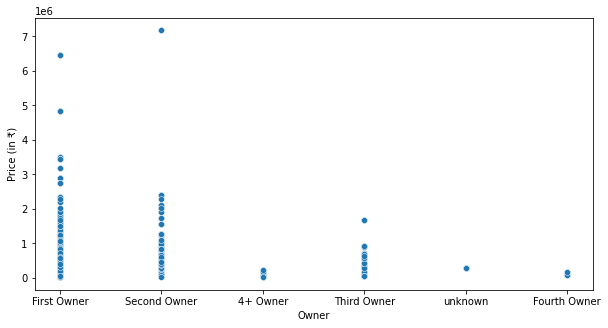

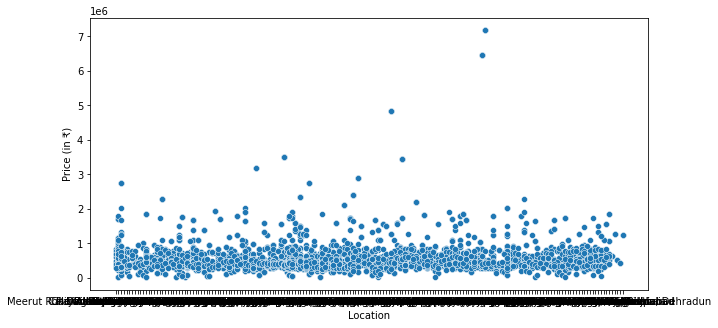

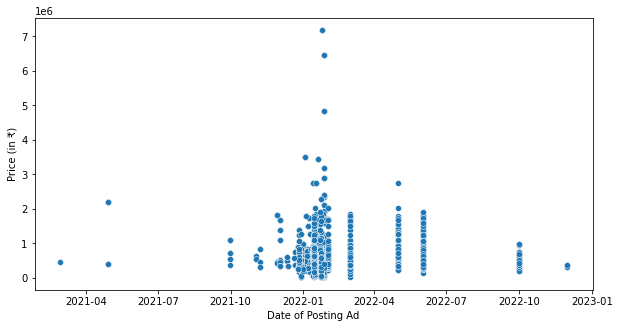

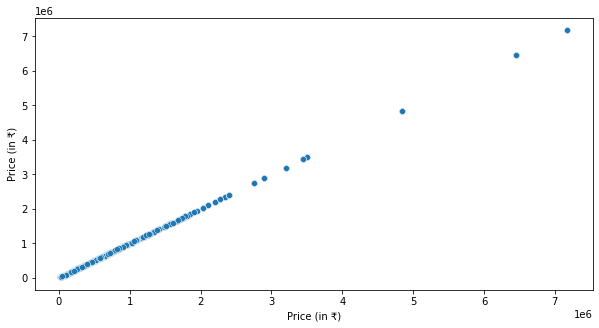

In [430]:
#measuring sales relation with all other columns:
for col in df.columns:
    if df[col].dtype != 'float64':
        plt.figure(figsize=(10,5))
        sns.scatterplot(x=col,y='Price (in ₹)',data=df)

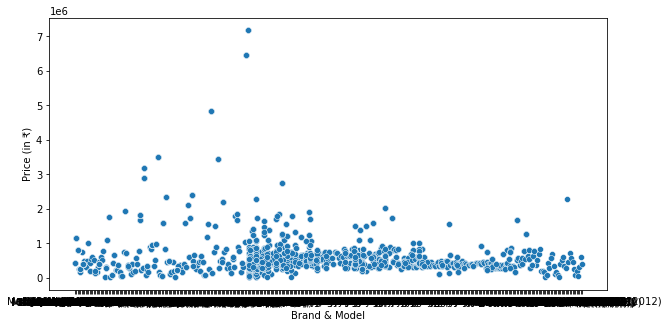

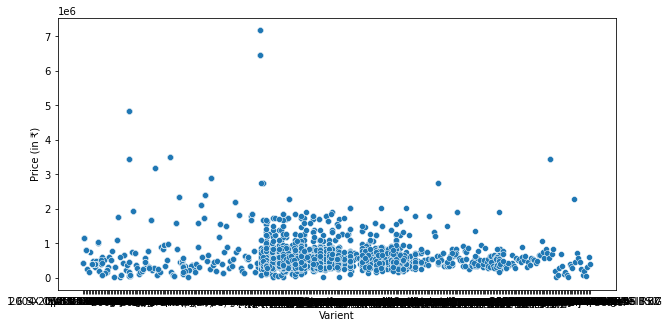

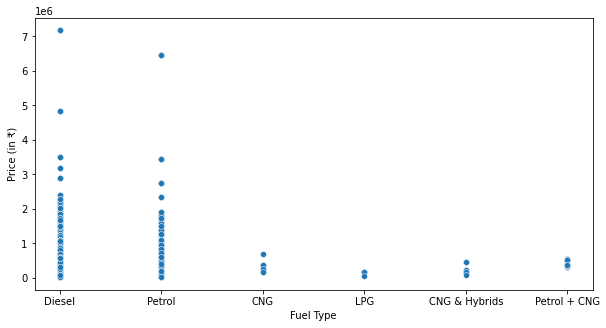

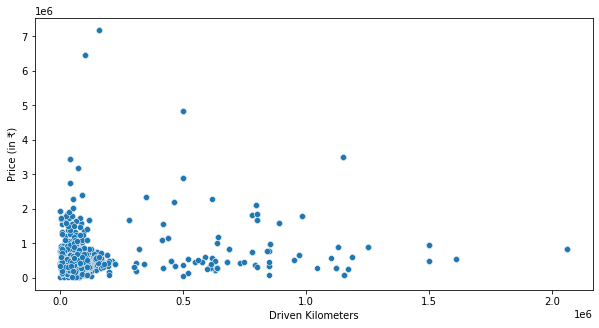

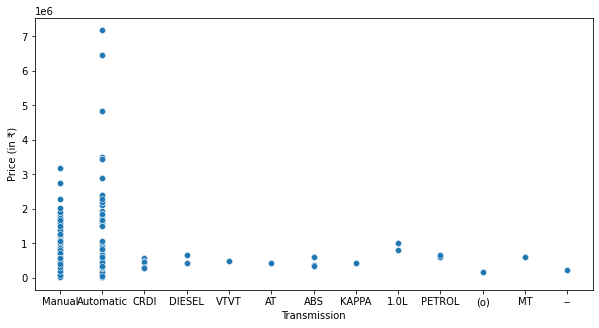

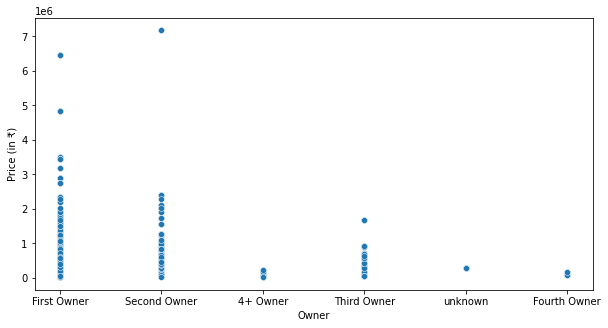

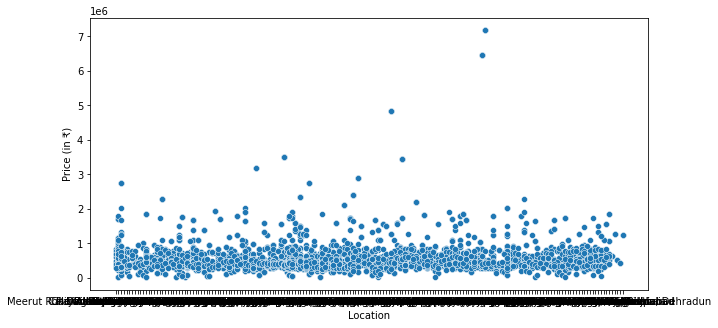

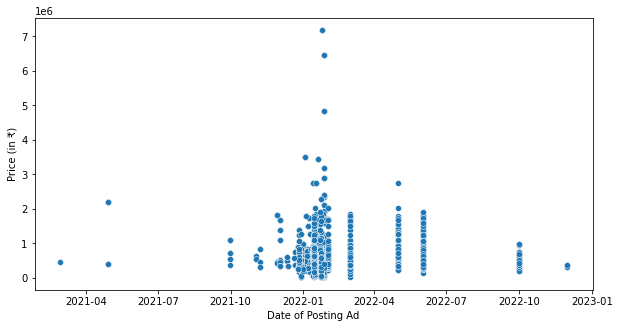

In [429]:
#measuring sales relation with all other columns:
for col in df.columns:
    if df[col].dtype != 'int64':
        plt.figure(figsize=(10,5))
        sns.scatterplot(x=col,y='Price (in ₹)',data=df)

<AxesSubplot:>

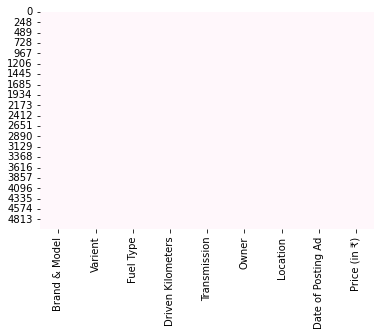

In [367]:
#checking for any missing data
# Missing Data Pattern 
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False, cmap='PuBu')

In [368]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()
#as we can see, there are no missing values

,Total,Percent
Brand & Model,0,0.0
Varient,0,0.0
Fuel Type,0,0.0
Driven Kilometers,0,0.0
Transmission,0,0.0


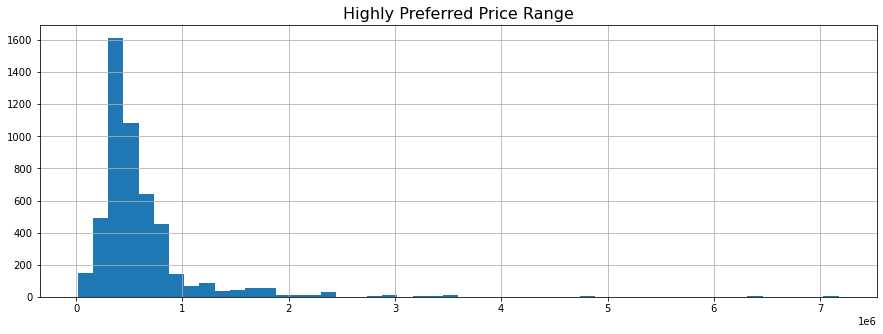

In [369]:
df["Price (in ₹)"].hist(bins=50, figsize=(15, 5))
plt.title("Highly Preferred Price Range", fontsize=16);

In [431]:
#label ensoding 
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [432]:
df.head()

,Brand & Model,Varient,Fuel Type,Driven Kilometers,Transmission,Owner,Location,Date of Posting Ad,Price (in ₹)
0,266,143,2,58000.0,10,1,123,2022-01-27,435000
1,243,22,2,438610.0,10,1,2,2022-01-23,1165101
2,255,130,4,17000.0,10,3,33,2022-01-25,815000
3,226,79,4,10000.0,10,1,115,2022-01-13,270000
4,246,121,4,70000.0,10,1,42,2022-01-13,185000


<AxesSubplot:>

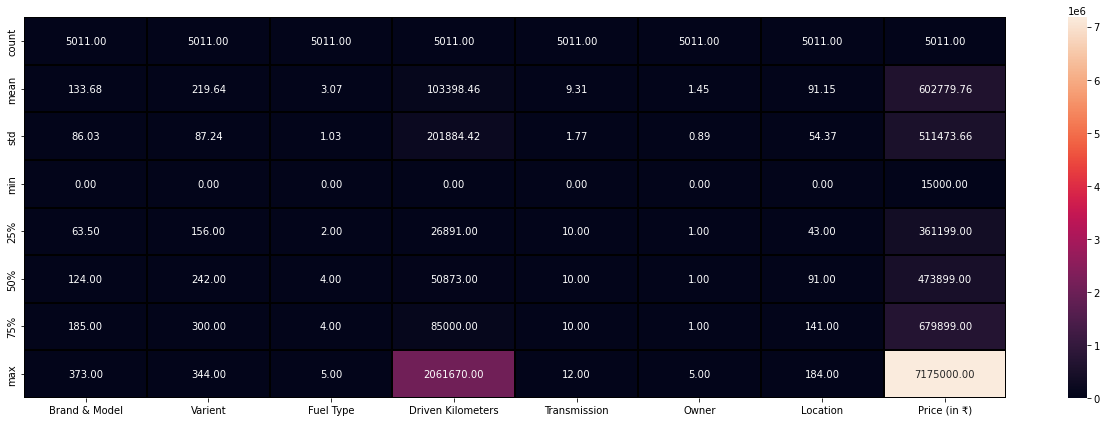

In [433]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

<AxesSubplot:>

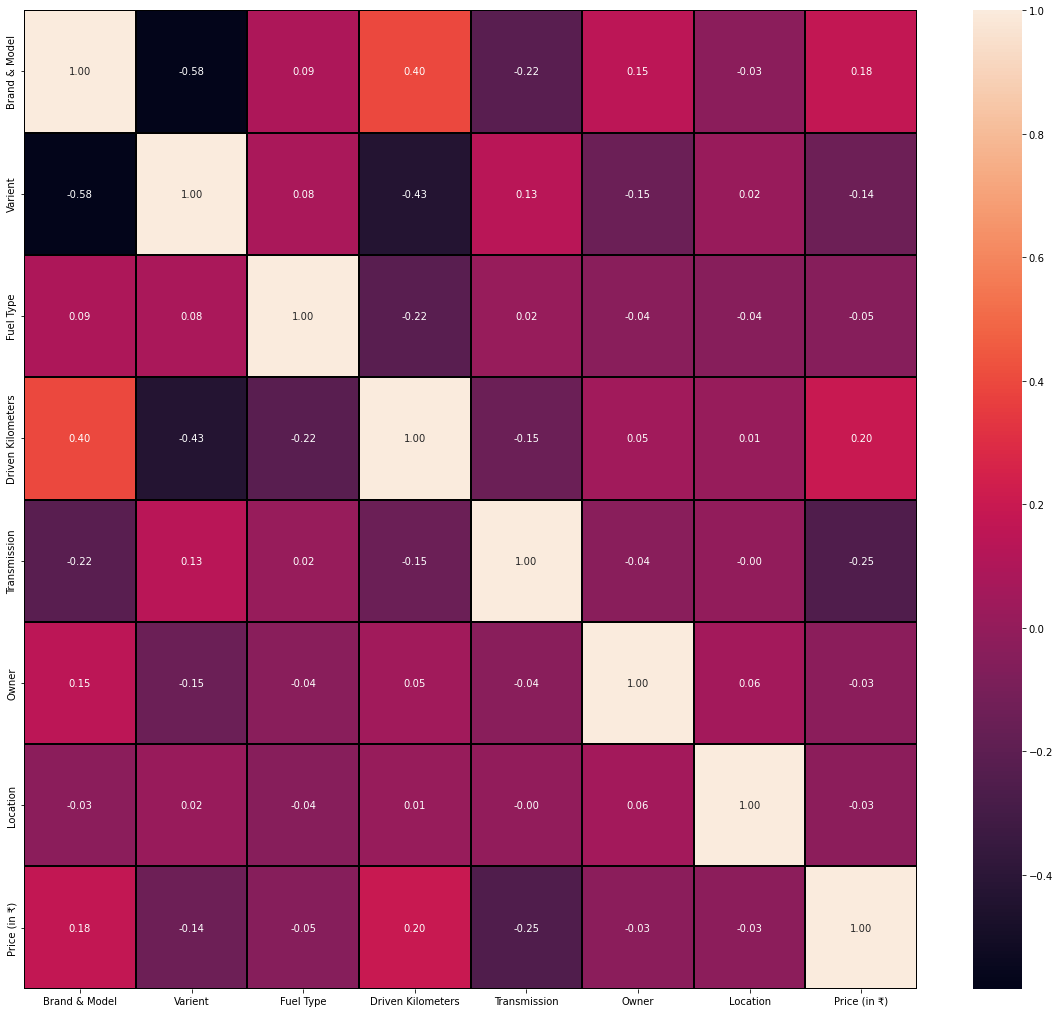

In [434]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [436]:
#RELATION WITH Price
corr_matrix=df.corr()
corr_matrix["Price (in ₹)"].sort_values(ascending=False)

Price (in ₹)         1.000000
Driven Kilometers    0.195761
Brand & Model        0.175108
Location            -0.027278
Owner               -0.033436
Fuel Type           -0.048455
Varient             -0.139465
Transmission        -0.250432
Name: Price (in ₹), dtype: float64

In [ ]:
#Driven Kilometers &  Brand & Model have the hghest correlation with Price

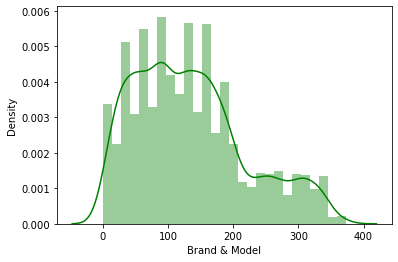

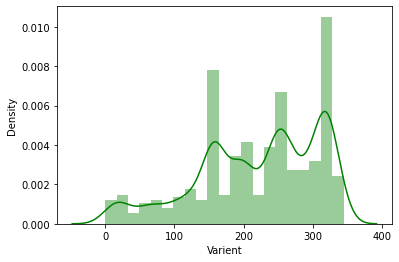

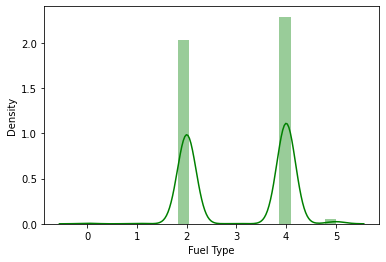

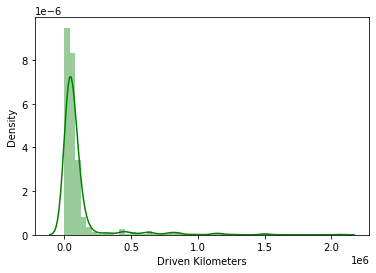

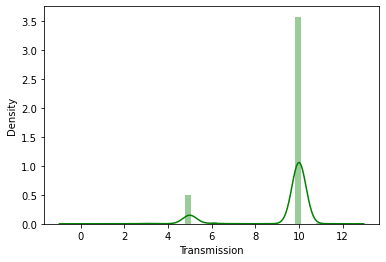

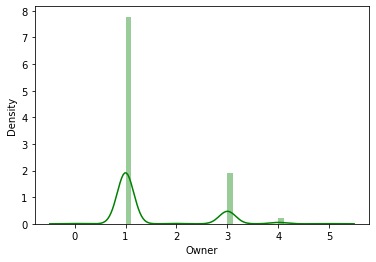

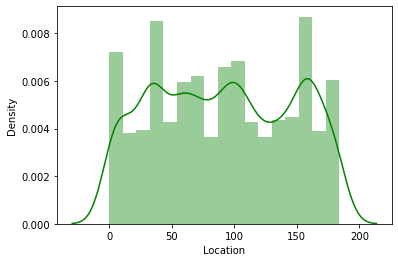

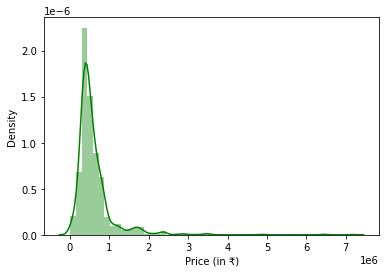

In [437]:
#checking skewness

for col in df.describe().columns:
    sns.distplot(df[col],color='g')
    plt.show()

In [438]:
df.skew()

Brand & Model        0.652163
Varient             -0.606563
Fuel Type           -0.146462
Driven Kilometers    4.763624
Transmission        -2.243327
Owner                1.526215
Location             0.029933
Price (in ₹)         5.309548
dtype: float64

In [ ]:
#Driven Kilometers & Transmission is showing skewness

In [477]:
#dropping the date column to process data
df.drop('Date of Posting Ad',axis=1,inplace=True)

KeyError: "['Date of Posting Ad'] not found in axis"

In [478]:
#dividing data
X = df.drop(['Price (in ₹)'], axis=1)
y=df['Price (in ₹)']

In [513]:
df['Price (in ₹)']

0        435000
1       1165101
2        815000
3        270000
4        185000
         ...   
5045      50000
5046     320000
5047     599000
5048     395000
5049     580000
Name: Price (in ₹), Length: 5011, dtype: int64

In [479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5011 entries, 0 to 5049
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand & Model      5011 non-null   int32  
 1   Varient            5011 non-null   int32  
 2   Fuel Type          5011 non-null   int32  
 3   Driven Kilometers  5011 non-null   float64
 4   Transmission       5011 non-null   int32  
 5   Owner              5011 non-null   int32  
 6   Location           5011 non-null   int32  
 7   Price (in ₹)       5011 non-null   int64  
dtypes: float64(1), int32(6), int64(1)
memory usage: 234.9 KB


In [485]:
#Transforming data to remove skewness:
from sklearn.preprocessing import power_transform
X_new=power_transform(X)

In [486]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Scaled_X=sc.fit_transform(X_new)


In [487]:
#Transforming data to remove skewness:
Scaled_X

array([[ 1.38268478, -0.9374429 , -1.04163908, ...,  0.35945409,
        -0.44168113,  0.62907684],
       [ 1.20053657, -2.06147148, -1.04163908, ...,  0.35945409,
        -0.44168113, -1.95870854],
       [ 1.29662774, -1.07665349,  0.9068391 , ...,  0.35945409,
         1.6864798 , -1.0303697 ],
       ...,
       [ 1.97347924, -1.16066209,  0.9068391 , ..., -2.35768298,
        -0.44168113,  0.67593671],
       [ 1.98693563, -1.0660615 ,  0.9068391 , ...,  0.35945409,
        -0.44168113,  0.03585368],
       [ 2.09318929, -1.04481816, -1.04163908, ...,  0.35945409,
        -0.44168113, -0.12338528]])

In [488]:
pd.DataFrame(Scaled_X, columns=X.columns).skew().sort_values(ascending=False)

Driven Kilometers    0.055637
Brand & Model       -0.090574
Fuel Type           -0.147436
Location            -0.291500
Varient             -0.378682
Owner               -0.465933
Transmission        -0.720882
dtype: float64

In [489]:
X.columns

Index(['Brand & Model', 'Varient', 'Fuel Type', 'Driven Kilometers',
       'Transmission', 'Owner', 'Location'],
      dtype='object')

In [490]:
x=pd.DataFrame(Scaled_X, columns=X.columns)

In [491]:
x.columns

Index(['Brand & Model', 'Varient', 'Fuel Type', 'Driven Kilometers',
       'Transmission', 'Owner', 'Location'],
      dtype='object')

In [492]:
#using linear regression
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lr=LinearRegression()

In [494]:
from sklearn.metrics import r2_score
for i in range(0,300):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train, pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.0830003596528609
At random state 0,the testing accuracy is:- 0.09372873456478148


At random state 1,the training accuracy is:- 0.0857322932883764
At random state 1,the testing accuracy is:- 0.083602898872568


At random state 2,the training accuracy is:- 0.07263114797612436
At random state 2,the testing accuracy is:- 0.10896616827219041


At random state 3,the training accuracy is:- 0.09885236434100131
At random state 3,the testing accuracy is:- 0.052626131720634794


At random state 4,the training accuracy is:- 0.0922709391748584
At random state 4,the testing accuracy is:- 0.057988692119015584


At random state 5,the training accuracy is:- 0.09193647453438614
At random state 5,the testing accuracy is:- 0.06957531307005715


At random state 6,the training accuracy is:- 0.09419423043694086
At random state 6,the testing accuracy is:- 0.06268254823576969


At random state 7,the training accuracy is:- 0.09630269086160437
At random state 7,the

At random state 63,the training accuracy is:- 0.09919668831411321
At random state 63,the testing accuracy is:- 0.05798149170304168


At random state 64,the training accuracy is:- 0.08868874749181066
At random state 64,the testing accuracy is:- 0.07225609736230199


At random state 65,the training accuracy is:- 0.08902315575697761
At random state 65,the testing accuracy is:- 0.07335210636561562


At random state 66,the training accuracy is:- 0.07998485991669535
At random state 66,the testing accuracy is:- 0.10009107235923276


At random state 67,the training accuracy is:- 0.06364384829627301
At random state 67,the testing accuracy is:- 0.11617620765225056


At random state 68,the training accuracy is:- 0.09482659373397606
At random state 68,the testing accuracy is:- 0.06783835879994882


At random state 69,the training accuracy is:- 0.08490126299803025
At random state 69,the testing accuracy is:- 0.08986187734288609


At random state 70,the training accuracy is:- 0.08743614870381278
At 

At random state 131,the training accuracy is:- 0.0770587419379074
At random state 131,the testing accuracy is:- 0.09411377976322044


At random state 132,the training accuracy is:- 0.08435178228561258
At random state 132,the testing accuracy is:- 0.08614461314774646


At random state 133,the training accuracy is:- 0.083743471404637
At random state 133,the testing accuracy is:- 0.08857367311900244


At random state 134,the training accuracy is:- 0.07278656079913937
At random state 134,the testing accuracy is:- 0.09789636075858654


At random state 135,the training accuracy is:- 0.10756515214731355
At random state 135,the testing accuracy is:- 0.019267502969996797


At random state 136,the training accuracy is:- 0.08508045232910011
At random state 136,the testing accuracy is:- 0.08966037054348641


At random state 137,the training accuracy is:- 0.08129125476798993
At random state 137,the testing accuracy is:- 0.08971486399035467


At random state 138,the training accuracy is:- 0.09864100

At random state 202,the training accuracy is:- 0.07715427045152667
At random state 202,the testing accuracy is:- 0.10476612149173858


At random state 203,the training accuracy is:- 0.086411628974839
At random state 203,the testing accuracy is:- 0.08634093137259635


At random state 204,the training accuracy is:- 0.07497780560210565
At random state 204,the testing accuracy is:- 0.09590856249050472


At random state 205,the training accuracy is:- 0.07532026476512221
At random state 205,the testing accuracy is:- 0.0973900774280495


At random state 206,the training accuracy is:- 0.07725160789468277
At random state 206,the testing accuracy is:- 0.10499321268578377


At random state 207,the training accuracy is:- 0.08054849290339361
At random state 207,the testing accuracy is:- 0.10625255677876111


At random state 208,the training accuracy is:- 0.09466840730798165
At random state 208,the testing accuracy is:- 0.06770840869661321


At random state 209,the training accuracy is:- 0.086694992

At random state 272,the training accuracy is:- 0.0806215508612339
At random state 272,the testing accuracy is:- 0.09480775318458212


At random state 273,the training accuracy is:- 0.07666049007160292
At random state 273,the testing accuracy is:- 0.11267664005880296


At random state 274,the training accuracy is:- 0.09936705000024726
At random state 274,the testing accuracy is:- 0.0488911140534648


At random state 275,the training accuracy is:- 0.09040456187970691
At random state 275,the testing accuracy is:- 0.07756009710814515


At random state 276,the training accuracy is:- 0.08072355189660241
At random state 276,the testing accuracy is:- 0.0961671105458426


At random state 277,the training accuracy is:- 0.08583358606622649
At random state 277,the testing accuracy is:- 0.08784150757487175


At random state 278,the training accuracy is:- 0.09498184204811311
At random state 278,the testing accuracy is:- 0.059884454114955465


At random state 279,the training accuracy is:- 0.09075287

In [496]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=15)

In [497]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [498]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 284479.7904573079
MSE: 260937763871.29694
RMSE: 510820.6768243597


In [499]:
lr.score(x_train , y_train)

0.07515133483565051

In [500]:
#With descision tree
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
predD=dt.predict(x_test)

In [501]:
print('MAE:', metrics.mean_absolute_error(y_test, predD))
print('MSE:', metrics.mean_squared_error(y_test, predD))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predD)))

MAE: 64756.69672785315
MSE: 43932153838.792496
RMSE: 209599.9853024625


In [502]:
dt.score(x_train , y_train)

0.9971448915816747

In [503]:
#With random forest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
predR=rfr.predict(x_test)

In [504]:
print('MAE:', metrics.mean_absolute_error(y_test, predR))
print('MSE:', metrics.mean_squared_error(y_test, predR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predR)))


MAE: 84164.98196397908
MSE: 29417985281.05871
RMSE: 171516.72012098035


In [505]:
rfr.score(x_train , y_train)

0.9852459906128679

In [506]:
#with Adaboost 
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)
predA=ada.predict(x_test)

In [507]:
print('MAE:', metrics.mean_absolute_error(y_test, predA))
print('MSE:', metrics.mean_squared_error(y_test, predA))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predA)))

MAE: 293248.0301384547
MSE: 136510861297.20705
RMSE: 369473.76266415324


In [508]:
ada.score(x_train , y_train)

0.4208804163827402

,Y Test,Pred
4764,303399,303399.0
2937,688699,688699.0
3850,474499,474499.0
2387,395699,395699.0
2438,435399,435399.0


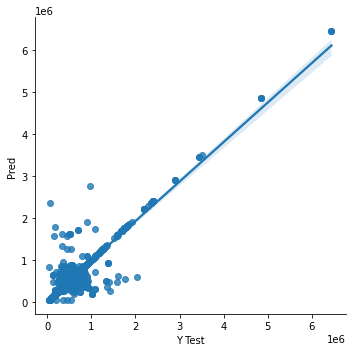

In [509]:
#With descision tree
data = pd.DataFrame({'Y Test':y_test , 'Pred':predD},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

,Y Test,Pred
4764,303399,362179.03
2937,688699,565282.00
3850,474499,490644.00
2387,395699,413186.00
2438,435399,474632.00


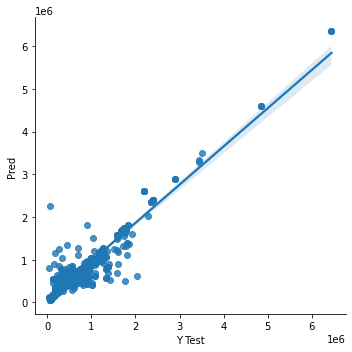

In [510]:
#With random forest
data = pd.DataFrame({'Y Test':y_test , 'Pred':predR},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

In [511]:
Random_Forest=rfr.fit(x_train,y_train)

In [512]:
import pickle as pkl
Car_Price_Model = 'Car_Price_Model.pickle'
pkl.dump(Random_Forest, open(Car_Price_Model,'wb'))

In [ ]:
df. 